Name: Reshma Jawale

## Exploratory Data Analysis - Retail

In this notebook, we will perform EDA on 'SampleSuperstore' dataset. The following two questions are answered:
    1. As a business manager, try to find weak areas where you can work to make more profit.
    2. What all business problems you can derive by solving the problems.

## Importing required libraries

In [126]:
# Importing all necessary libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [127]:
# Reading data from excel file

df = pd.read_csv('SampleSuperstore.csv')
print("Data imported successfully")

df.head(10)

Data imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Analysing Data

In [128]:
# Returns the dimensions of the dataset
print(f'The Shape of the DataFrame is: {df.shape}')
print(f'The number of rows in the DataFrame are: {df.shape[0]}')
print(f'The number of columns in the DataFrame are: {df.shape[1]}')

The Shape of the DataFrame is: (9994, 13)
The number of rows in the DataFrame are: 9994
The number of columns in the DataFrame are: 13


In [129]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [131]:
# Checking for missing values

df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [132]:
df.describe()  # describes the statistical data for the columns of type int and float

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [134]:
df.nunique() # Displays the unique values in our dataset

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [135]:
# Check for all the duplicated data in our dataset

df.duplicated().sum()

17

## Feature Selection

In [136]:
# Country and Postal Code give us no information. Dropping the two columns

df.drop(['Country','Postal Code'], axis = 1, inplace = True)

In [137]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [138]:
 # Correlation of dataset
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [139]:
 # Covariance of dataset
df.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


## Data Visualisation

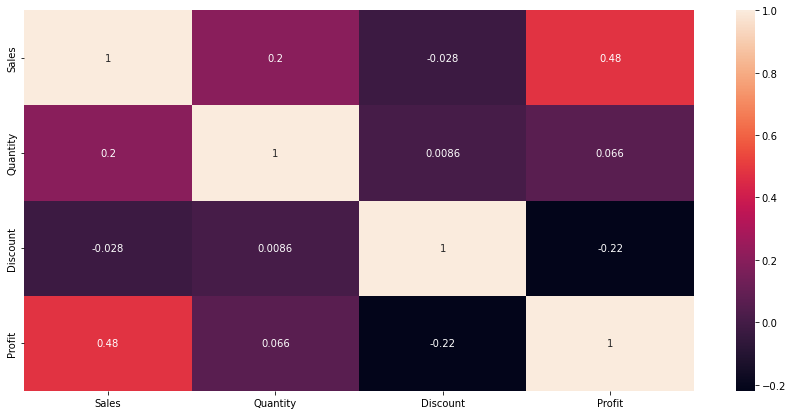

In [140]:
# Heatmap to check the collinearity between sales, quantity, discount and profit
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

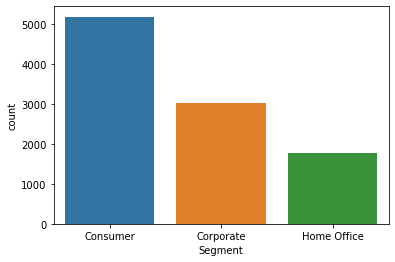

In [142]:
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Region', ylabel='count'>

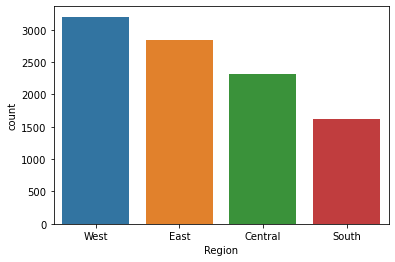

In [144]:
sns.countplot(x='Region', data=df, order=df['Region'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Category', ylabel='count'>

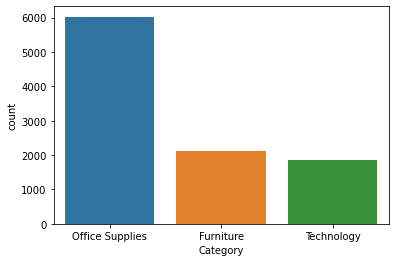

In [146]:
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

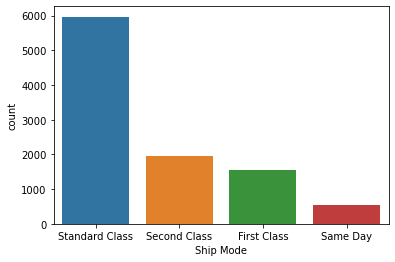

In [163]:
sns.countplot(x='Ship Mode', data=df, order=df['Ship Mode'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

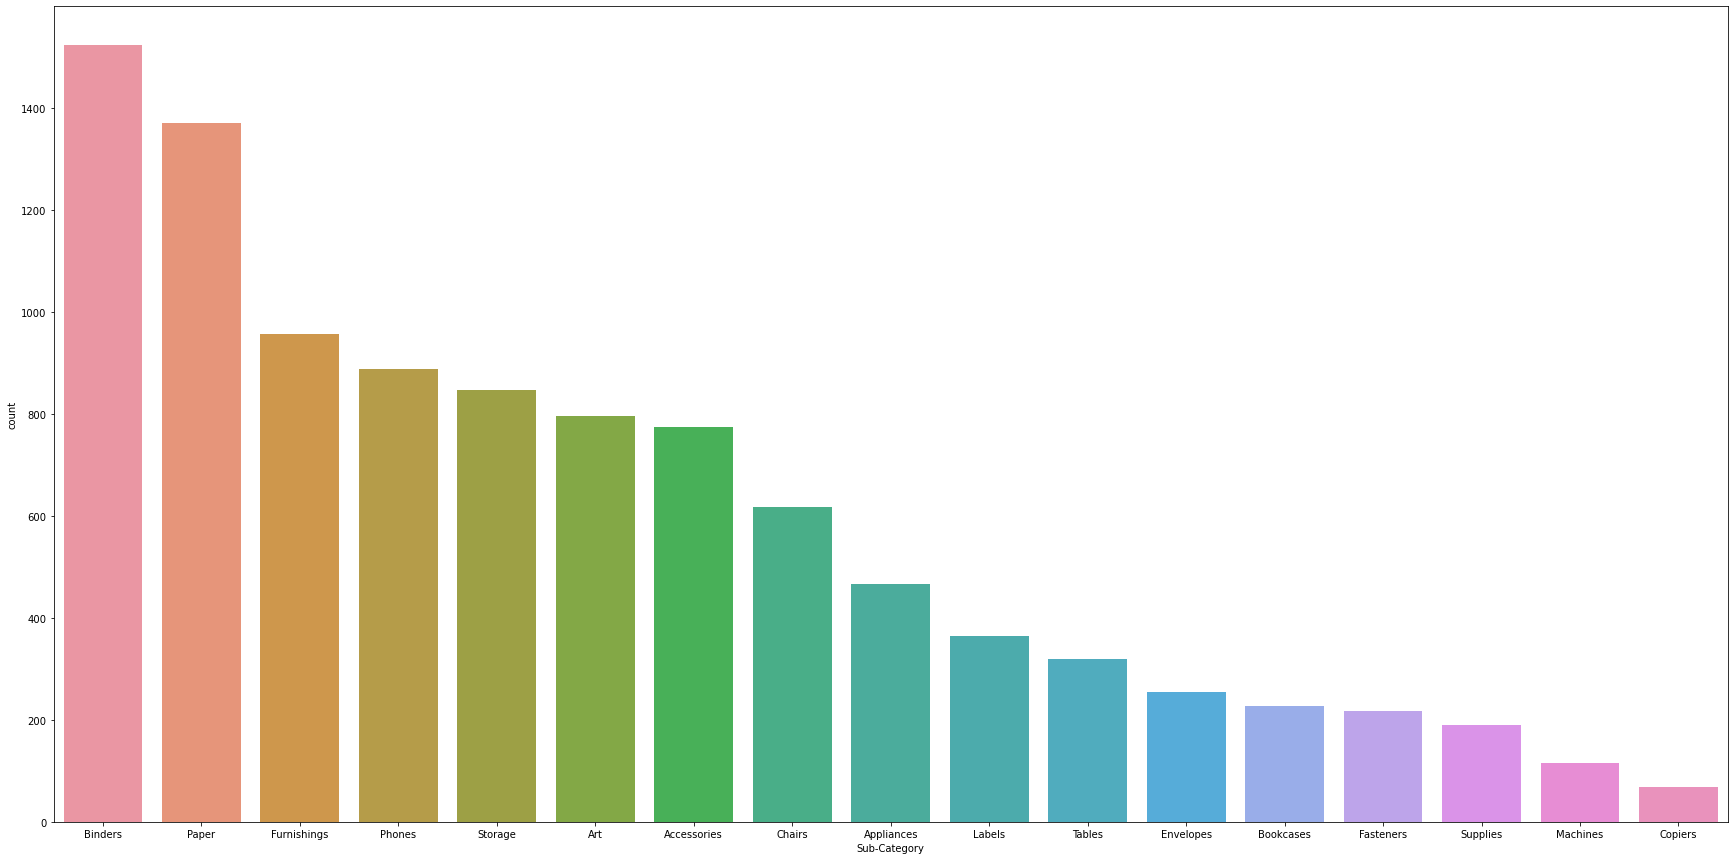

In [149]:
plt.figure(figsize=(30,15))
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().sort_values(ascending=False).index)

Conclusion: The most famous sub-categories are Binders, Paper and Furnishings. The owners can concentrate on keeping stock of these in their inventory.
Machines and Copiers are the least famous sub-categories. A strategy to increase them should be devised.

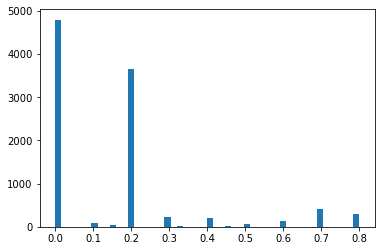

In [150]:
plt.hist(df['Discount'], bins = 50)
plt.show()

Conclusion: Most of the customers buy when the discount is between 0-20%.

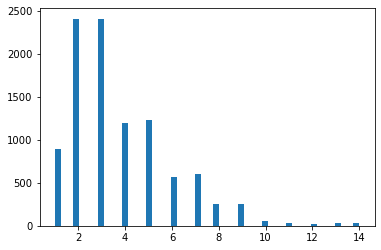

In [151]:
plt.hist(df['Quantity'], bins = 50)
plt.show()

Conclusion: Most of the customers buy when the Quantity is either 2 or 3.

<AxesSubplot:xlabel='State'>

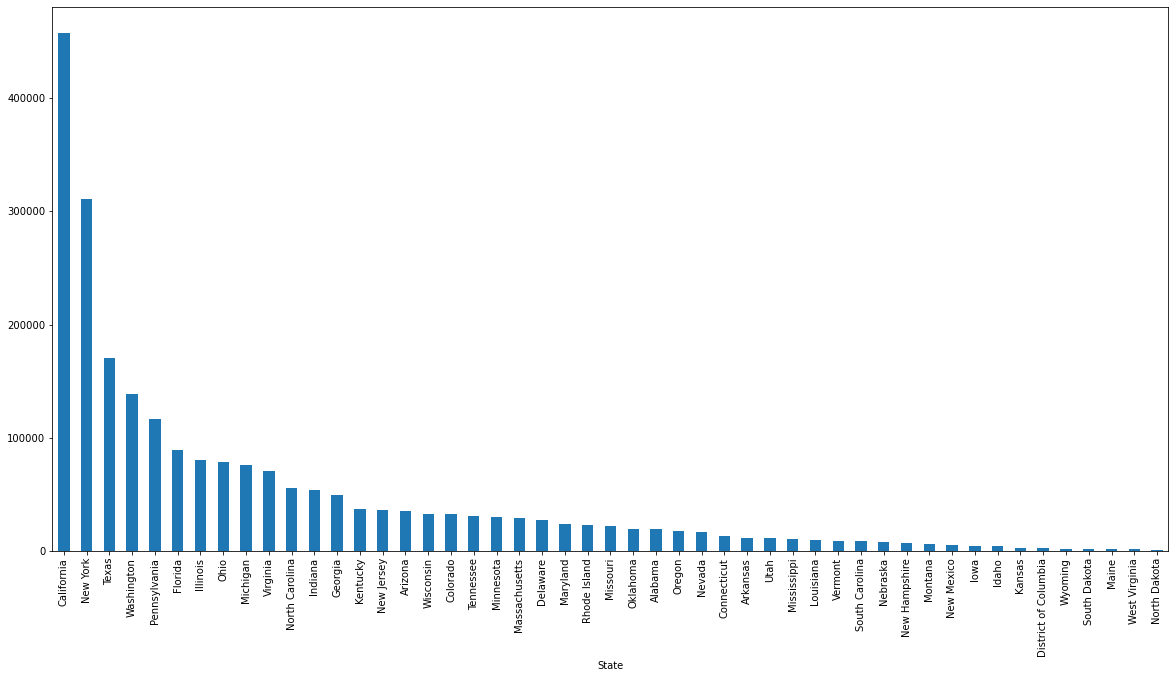

In [152]:
sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales.plot.bar(figsize=(20,10))

Conclusion: From the above graph, we can see that California, New York and Texas are the three states that have the highest rate of Sales out of all 49 states in United States. We can also see that Maine, West Virginia, North Dakota are the states with the least Sales. These are the states where attention should be paid.

<AxesSubplot:xlabel='State'>

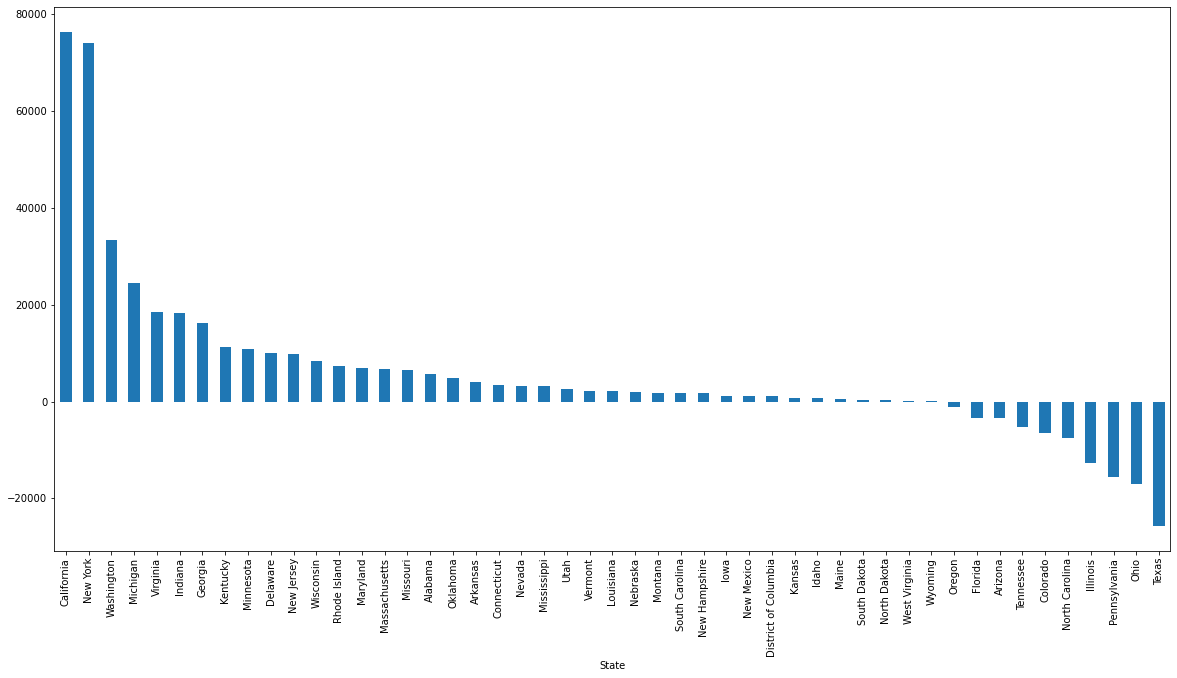

In [153]:
profits_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
profits_states.plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='Sub-Category'>

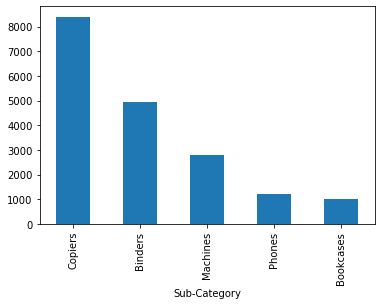

In [154]:
df.groupby('Sub-Category')['Profit'].max().nlargest(5).plot.bar() # Top 10 profit making sub-categories are shown here in the plot

In [155]:
profits_states = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
profits_states

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Sub-Category'>

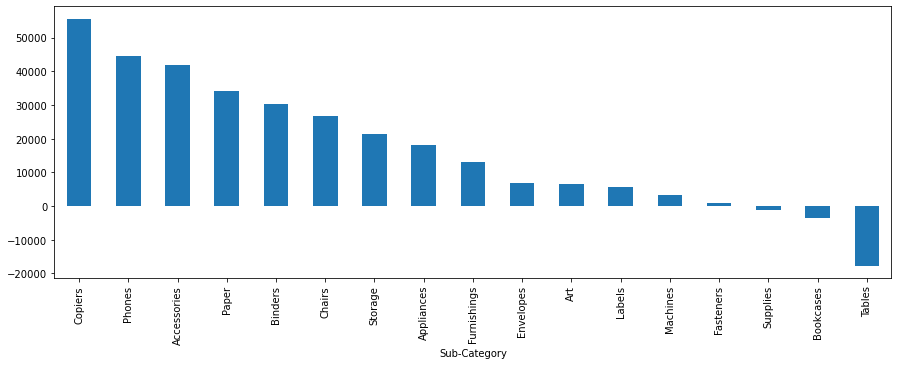

In [156]:
profits_states = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
profits_states.plot.bar(figsize=(15,5))

Conclusion: Sub categories like Copiers, Binders and Machine seem to generate highest amount of profit. Seller should focus on maintaining inventory of these items. Similarly, Supplies, Bookcases, Tables are the categories that are at a loss so the focus should be placed on these for improving business.

C:\Users\Reshma Jawale\AppData\Local\Temp/ipykernel_10196/102239348.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profits_states = df.groupby('Region')['Sales','Profit'].sum()


<AxesSubplot:xlabel='Region'>

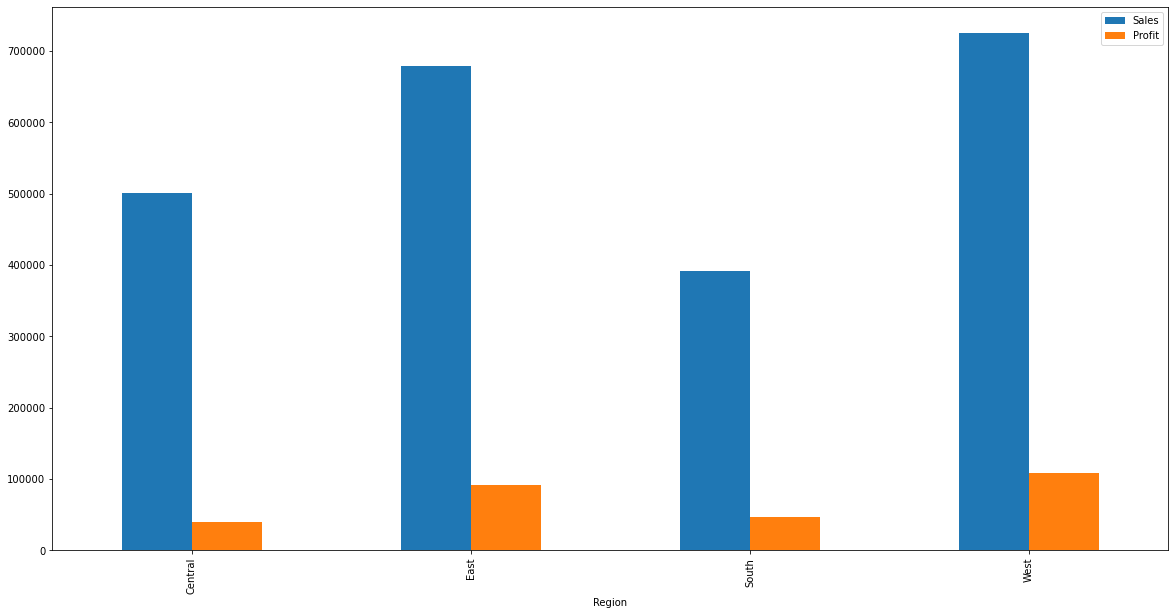

In [157]:
profits_states = df.groupby('Region')['Sales','Profit'].sum()
profits_states.plot.bar(figsize=(20,10))

From the above graph, we can see South region has the lowest Sales and Central area has lowest profit.

<AxesSubplot:xlabel='Segment'>

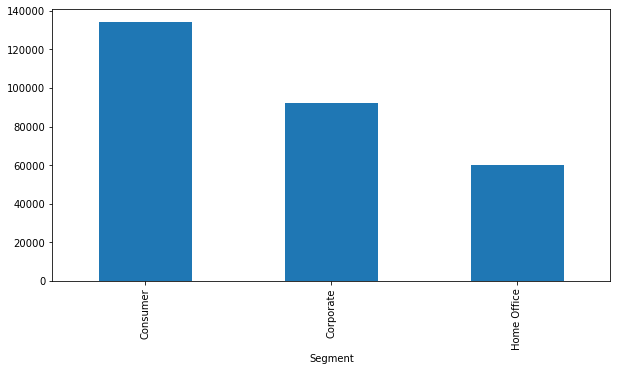

In [158]:
sales = df.groupby('Segment')['Profit'].sum()
sales.plot.bar(figsize=(10,5))

Conclusion: We can see that Consumer segment generates the most amount of profit. For business to expand, weak areas are home office which be paid attention to

<AxesSubplot:xlabel='Category'>

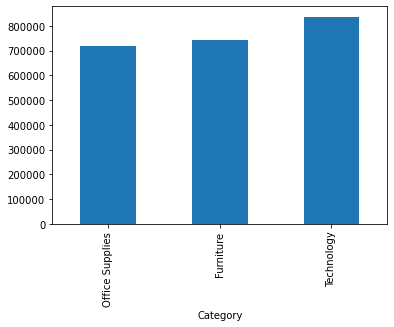

In [159]:
sales = df.groupby('Category')['Sales'].sum().sort_values()
sales.plot.bar()

C:\Users\Reshma Jawale\AppData\Local\Temp/ipykernel_10196/2938492760.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Category_Profit_Sale = df.groupby('Category')['Sales','Profit'].sum()


<AxesSubplot:xlabel='Category'>

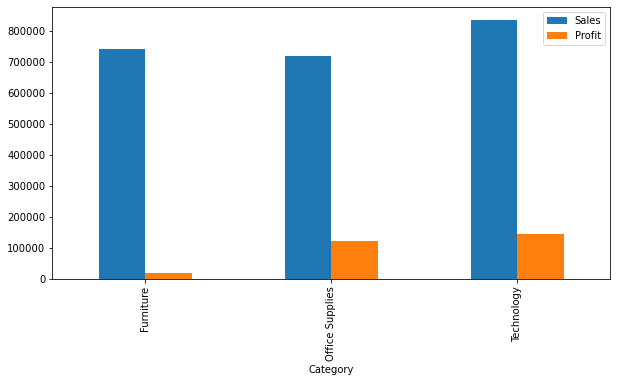

In [160]:
Category_Profit_Sale = df.groupby('Category')['Sales','Profit'].sum()
Category_Profit_Sale.plot.bar(figsize=(10,5))

[]

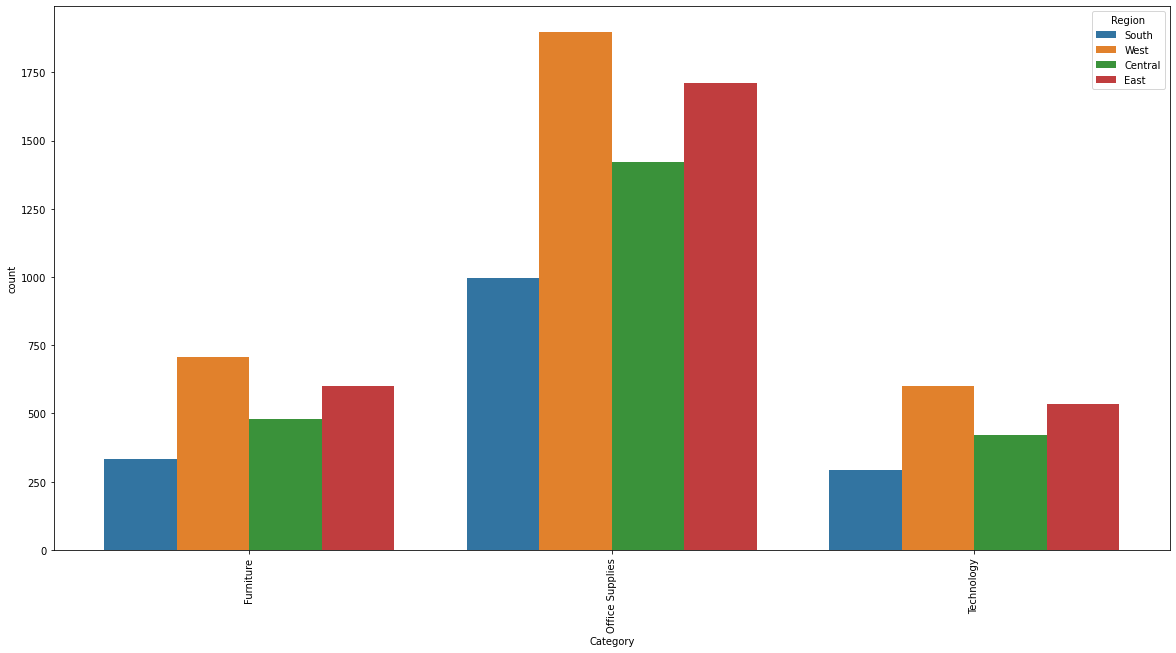

In [161]:
# Category vs Region

plt.figure(figsize=(20,10))
sns.countplot(x="Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

In [162]:
# sum the sales, profit, discount, quantity according to every state of region and also according to sub-categories sales
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

C:\Users\Reshma Jawale\AppData\Local\Temp/ipykernel_10196/806345393.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645
